# Primera iteración modelo
Objetivo.Conocer los datos iniciales más relevantes del modelo random forest utilizado en el scoring anteiror.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree.export import export_text
from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn import tree

%matplotlib inline

In [6]:
# I downloaded the info from SAS. I chunck it into 4 files. For future iterations i ll try to get it directly from SAS
# For automation purpose i am going to look for the files path
TABLON_INICIAL1_path_50 = os.path.abspath("TABLON_INICIAL1__50K.CSV") 
TABLON_INICIAL1_path_100 = os.path.abspath("TABLON_INICIAL1_50_100K.CSV") 
TABLON_INICIAL1_path_150 = os.path.abspath("TABLON_INICIAL1_100_150K.CSV") 
TABLON_INICIAL1_path_200 = os.path.abspath("TABLON_INICIAL1_150k_FIN.CSV") 
TABLON_INICIAL1_path_50
TABLON_INICIAL1_path_100
TABLON_INICIAL1_path_150
TABLON_INICIAL1_path_200

'C:\\Users\\N58645\\OneDrive - Santander Office 365\\Otros\\kschool\\TFM\\TABLON_INICIAL1_150k_FIN.CSV'

In [7]:
# I attached the basic the info into a dataset with SQL.I filled nan with cero. I downloaded the info from SAS. I chunck it into 4 files. For future iterations i ll try to get it directly from SAS
TABLON_INICIAL1__50K = pd.read_csv(TABLON_INICIAL1_path_50,sep=";")
TABLON_INICIAL1_50_100K = pd.read_csv(TABLON_INICIAL1_path_100,sep=";")
TABLON_INICIAL1_100_150K = pd.read_csv(TABLON_INICIAL1_path_150,sep=";")
TABLON_INICIAL1_150k_FIN = pd.read_csv(TABLON_INICIAL1_path_200,sep=";")

C:\Users\N58645\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
# TABLON_INICIAL1__50K.head()

In [98]:
# concat 4 files
TABLON_INICIAL = [TABLON_INICIAL1__50K, TABLON_INICIAL1_50_100K, TABLON_INICIAL1_100_150K , TABLON_INICIAL1_150k_FIN]
total_clients_file = pd.concat(TABLON_INICIAL)
total_clients_file.shape
pd.set_option('display.max_columns',48)
# total_clients_file.sample(10)

In [9]:
# check for duplicates.

duplicateRowsDF = total_clients_file[total_clients_file.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [tipopers, codpers, score, sexo, edad, pais_naci, pais_resi, nivestud, idiomapr, tiptraba, oficin, tipo_est, codseg, cpper, cprovper, clocaper, autonper, cpaisper, codine, poblac_cmun, rentadisp_cmun, num_tarj_credito_0m, imp_med_tarj_credito_0m, num_cuentas_0m, imp_med_cuentas_0m, num_fondos_0m, imp_med_fondos_0m, H2496_INDHIPOT, num_valores_0m, imp_med_valores_0m, acc_0m, movil_0m, pc_0m, tablet_0m, transferencias_nacional_0m, transferencias_traspaso_0m, app_par_0m, web_par_0m, imp_trfe_0m, imp_trfr_0m, imp_nompenr_0m, imp_rec_0m, imp_tar_0m, num_trfr_0m, num_trfe_0m, num_rec_0m, contrata_consumo]
Index: []


In [10]:
# display all rows
pd.set_option('display.max_rows',48)
total_clients_file.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 47 columns):
tipopers                      200000 non-null object
codpers                       200000 non-null int64
score                         200000 non-null object
sexo                          200000 non-null object
edad                          200000 non-null int64
pais_naci                     200000 non-null object
pais_resi                     199999 non-null object
nivestud                      200000 non-null int64
idiomapr                      200000 non-null object
tiptraba                      200000 non-null object
oficin                        199951 non-null float64
tipo_est                      199991 non-null object
codseg                        200000 non-null object
cpper                         198902 non-null object
cprovper                      197951 non-null object
clocaper                      200000 non-null int64
autonper                      197951 non-null

In [11]:
# filter non residents to avoid noise. 

total_clients_file = total_clients_file[total_clients_file['pais_resi']== 'ES']
total_clients_file.shape

# Some variables are no going to be relevant for this study so i am going to drop them

total_clients_file.drop(['pais_naci', 'pais_resi','idiomapr','cpaisper','tipopers','contrata_consumo'], axis=1,inplace =True)



In [99]:
## transform nan and other wierd values

total_clients_file.replace(np.nan, '999',inplace=True)
total_clients_file['cpper'].replace('********', value='999',inplace=True)
total_clients_file['cpper'].replace('39570POT', value='666',inplace=True)
total_clients_file['cpper'].replace('151 34', value='666',inplace=True)
total_clients_file['cprovper'].replace('**', value='999',inplace=True)
total_clients_file['autonper'].replace('**', value='999',inplace=True)

## convert the score column dtype into numeric. Commas as decimal puntuation, change them by dots.
total_clients_file['Score_float'] = total_clients_file['score'].replace(',', '.',regex=True).astype(float)
total_clients_file['Score_float'].to_frame()

total_clients_file.drop(['score'], axis=1,inplace =True)


## decimal with commas by dots for all columns with 'imp' as part of the name

commas= total_clients_file.loc[:,total_clients_file.columns.str.contains("imp")]

for value in commas: 
    total_clients_file[value].replace(',', '.',regex=True,inplace =True)
    total_clients_file[value].to_frame()
    
## decimal with commas by dots    
total_clients_file['movil_0m'].replace(',', '.',regex=True,inplace =True)
total_clients_file['movil_0m'].to_frame()

total_clients_file['pc_0m'].replace(',', '.',regex=True,inplace =True)
total_clients_file['pc_0m'].to_frame()

total_clients_file['poblac_cmun'].replace(',', '.',regex=True,inplace =True)
total_clients_file['poblac_cmun'].to_frame()

total_clients_file['tablet_0m'].replace(',', '.',regex=True,inplace =True)
total_clients_file['tablet_0m'].to_frame()

total_clients_file['tablet_0m'].head()
# weird_value = total_clients_file_categ[total_clients_file_categ['cpper'] =='********']
# weird_value

0    0
1    0
2    0
3    0
4    0
Name: tablet_0m, dtype: object

In [100]:
#change categorical variables into dummies. keeping one file with all info
total_clients_file_cat = total_clients_file.filter(['sexo','tiptraba','tipo_est','codseg','H2496_INDHIPOT'])


lb_make = LabelEncoder()

total_clients_file_cat['sexo_cat']=lb_make.fit_transform(total_clients_file_cat['sexo'])
total_clients_file_cat['sexo_cat'].to_frame().head()

total_clients_file_cat['tiptraba_cat']=lb_make.fit_transform(total_clients_file_cat['tiptraba'])
total_clients_file_cat['tiptraba_cat'].to_frame().head(20)

# this varible have to be converted from object to str first.
total_clients_file_cat['tipo_est_cat'] = str(total_clients_file_cat['tipo_est'])
total_clients_file_cat['tipo_est_cat']=lb_make.fit_transform(total_clients_file_cat['tipo_est_cat'])
total_clients_file_cat['tipo_est_cat'].to_frame().head()

total_clients_file_cat['codseg_cat']=lb_make.fit_transform(total_clients_file_cat['codseg'])
total_clients_file_cat['codseg_cat'].to_frame().head()

total_clients_file_cat['Hipo_cat']=lb_make.fit_transform(total_clients_file_cat['H2496_INDHIPOT'])
total_clients_file_cat['Hipo_cat'].to_frame().head()

#merge all new columns into one DF
total_clients_file_cat = {'sexo_cat':total_clients_file_cat['sexo_cat'],
                          'tiptraba_cat':total_clients_file_cat['tiptraba_cat'],
                          'tipo_est_cat': total_clients_file_cat['tipo_est_cat'], 
                          'codseg_cat':total_clients_file_cat['codseg_cat'],
                           'Hipo_cat':total_clients_file_cat['Hipo_cat']} # importante N es 1 y S es cero. 
total_clients_file_cat_new = pd.DataFrame(total_clients_file_cat, columns = ['sexo_cat','tiptraba_cat','tipo_est_cat','codseg_cat','Hipo_cat'])

#add the new columns to the old DF and drop the categorical columns.

total_clients_file_categ = pd.concat([total_clients_file, total_clients_file_cat_new],axis =1)

# drop de categorical I just transformed
total_clients_file_categ.drop(['sexo','tiptraba','tipo_est','codseg','H2496_INDHIPOT'], axis=1,inplace =True)
# total_clients_file_categ.head()


In [14]:
# changing all columns types to numerics. 


columns = total_clients_file_categ.select_dtypes(exclude=['int64'])

for cols in columns:
    total_clients_file_categ[cols] = total_clients_file_categ[cols].apply(pd.to_numeric)

# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [102]:
numeric_columns = total_clients_file_categ.select_dtypes(include=[np.float64,np.int64])
numeric_columns.describe()

codpers           edad       nivestud       clocaper  \
count  2.000000e+05  200000.000000  200000.000000  200000.000000   
mean   2.277292e+07      53.410185       2.739745    9920.209680   
std    1.633385e+07      16.815030       1.516237   27450.849492   
min    1.957000e+03      18.000000       1.000000       0.000000   
25%    8.128349e+06      41.000000       2.000000     125.000000   
50%    1.858436e+07      53.000000       2.000000     250.000000   
75%    3.696020e+07      66.000000       3.000000     604.000000   
max    5.181865e+07      89.000000       6.000000   91880.000000   

       rentadisp_cmun  num_tarj_credito_0m  num_cuentas_0m  num_fondos_0m  \
count   200000.000000        200000.000000    200000.00000  200000.000000   
mean     20647.566550             0.621300         1.21969       0.300715   
std       6861.228946             0.947856         0.60138       2.083940   
min          0.000000             0.000000         0.00000       0.000000   
25%      17679.000000             0.000000         1.00000       0.000000   
50%      20960.000000             0.000000         1.00000       0.000000   
75%      23090.000000             2.000000         1.00000       0.000000   
max      53428.000000            10.000000        12.00000     125.000000   

       num_valores_0m         acc_0m  transferencias_nacional_0m  \
count   200000.000000  200000.000000               200000.000000   
mean         0.551815      11.505340                    0.333055   
std          0.870114      20.050754                    1.134696   
min          0.000000       0.000000                    0.000000   
25%          0.000000       0.000000                    0.000000   
50%          0.000000       4.000000                    0.000000   
75%          1.000000      15.000000                    0.000000   
max         26.000000     501.000000                   73.000000   

       transferencias_traspaso_0m     app_par_0m     web_par_0m  \
count               200000.000000  200000.000000  200000.000000   
mean                     0.268375       8.533350       2.431100   
std                      1.494514      17.448925       6.582389   
min                      0.000000       0.000000       0.000000   
25%                      0.000000       0.000000       0.000000   
50%                      0.000000       0.000000       0.000000   
75%                      0.000000      10.000000       2.000000   
max                    111.000000     363.000000     250.000000   

         num_trfr_0m    num_trfe_0m     num_rec_0m  contrata_consumo  \
count  200000.000000  200000.000000  200000.000000     200000.000000   
mean        2.414075       1.364225       5.047915          0.018005   
std         3.435528       5.521863       5.302817          0.132970   
min         0.000000       0.000000       0.000000          0.000000   
25%         1.000000       0.000000       2.000000          0.000000   
50%         2.000000       0.000000       4.000000          0.000000   
75%         3.000000       2.000000       7.000000          0.000000   
max       175.000000    2000.000000     463.000000          1.000000   

         Score_float  
count  200000.000000  
mean        0.311799  
std         0.206102  
min         0.014113  
25%         0.141014  
50%         0.281794  
75%         0.429255  
max         0.958406

In [17]:
# basic stats not included in describe

for col in numeric_columns:
    
        sum_col = numeric_columns[col].sum()
        median_col = numeric_columns[col].median() 
        print('Basic stat clients %s' % col)
        print('sum = %.2f ,median = %.2f' % (sum_col,median_col))
    

Basic stat clients codpers
sum = 4474440519857.00 ,median = 18446772.50
Basic stat clients edad
sum = 10573577.00 ,median = 53.00
Basic stat clients nivestud
sum = 542381.00 ,median = 2.00
Basic stat clients oficin
sum = 761976127.00 ,median = 4262.00
Basic stat clients cpper
sum = 5249360443.00 ,median = 28049.00
Basic stat clients cprovper
sum = 7260076.00 ,median = 28.00
Basic stat clients clocaper
sum = 1983765135.00 ,median = 254.00
Basic stat clients autonper
sum = 3732204.00 ,median = 9.00
Basic stat clients codine
sum = 5184467294.00 ,median = 28079.00
Basic stat clients poblac_cmun
sum = 97683479048.89 ,median = 68859.00
Basic stat clients rentadisp_cmun
sum = 4129225279.00 ,median = 20980.00
Basic stat clients num_tarj_credito_0m
sum = 123924.00 ,median = 0.00
Basic stat clients imp_med_tarj_credito_0m
sum = 17063121.09 ,median = 0.00
Basic stat clients num_cuentas_0m
sum = 241667.00 ,median = 1.00
Basic stat clients imp_med_cuentas_0m
sum = 4345144310.85 ,median = 4991.36
Ba

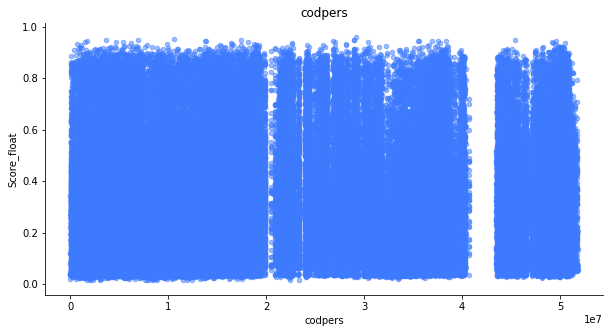

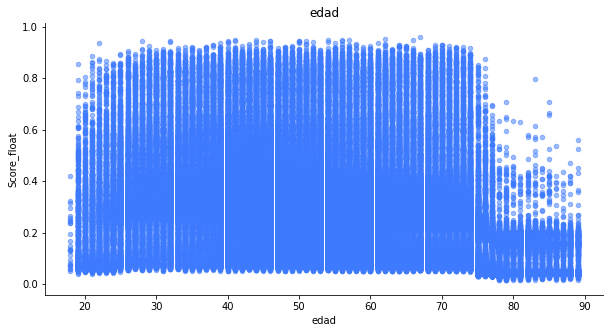

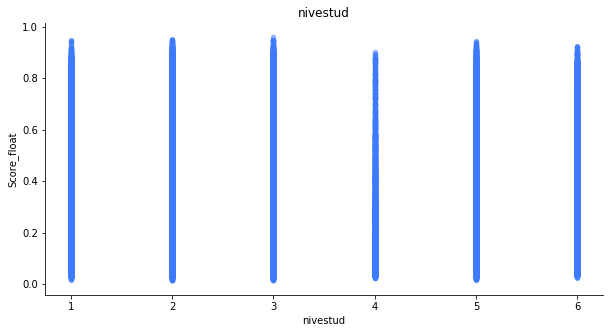

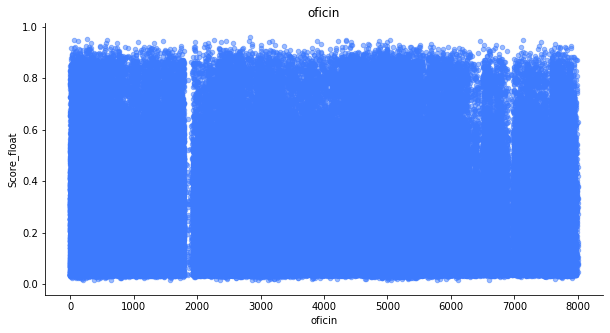

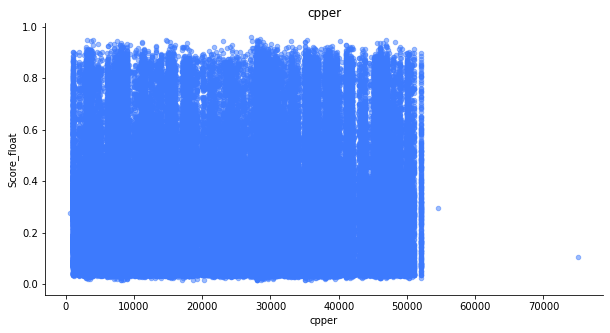

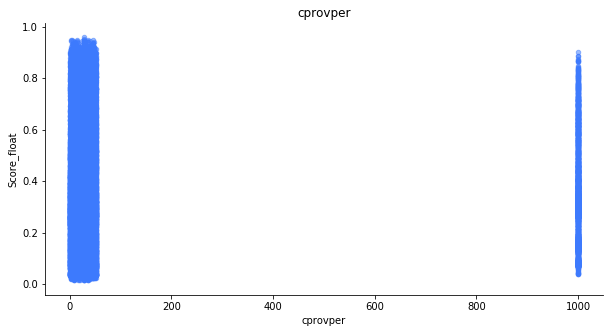

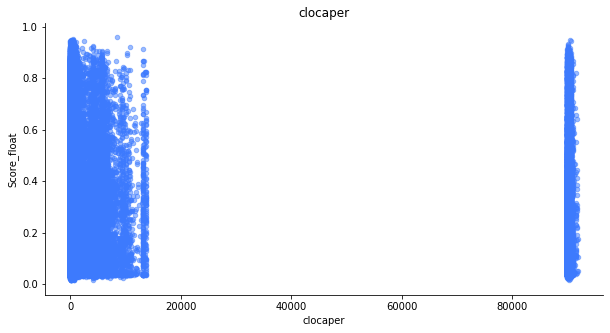

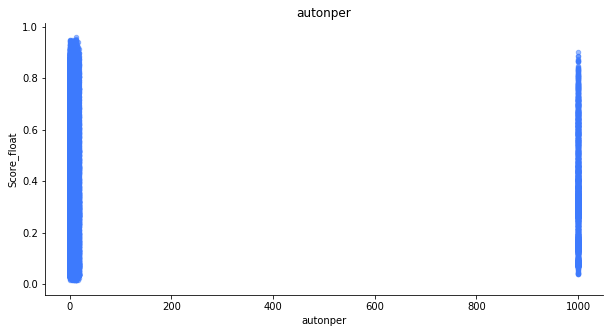

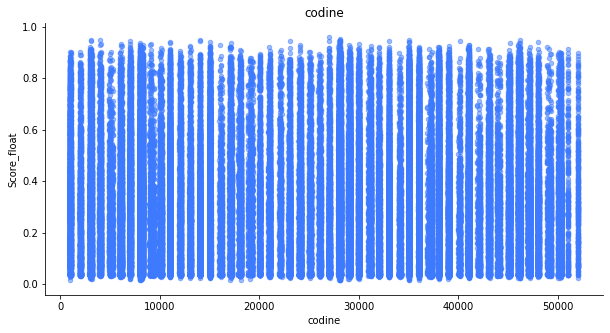

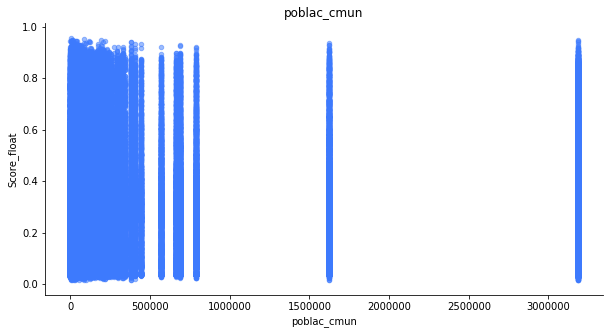

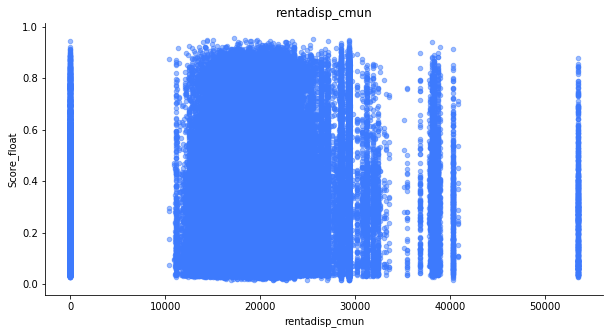

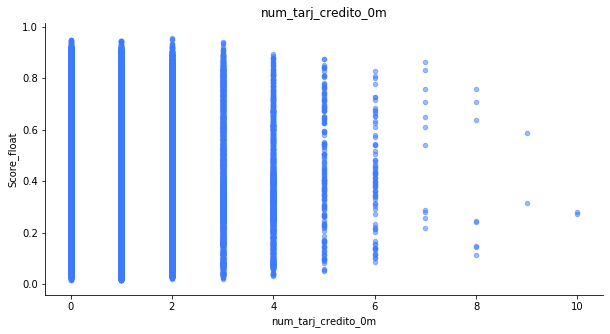

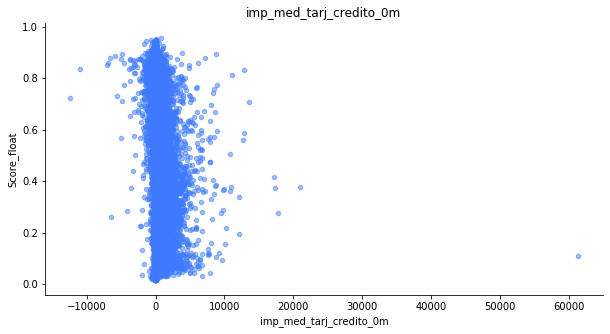

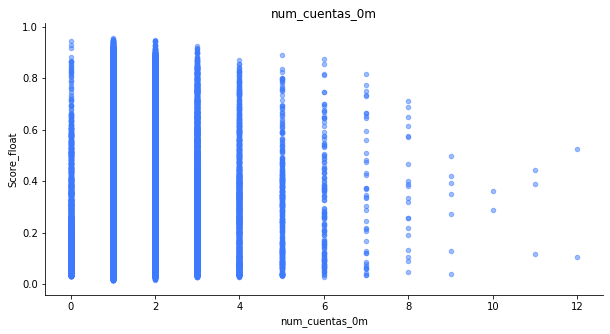

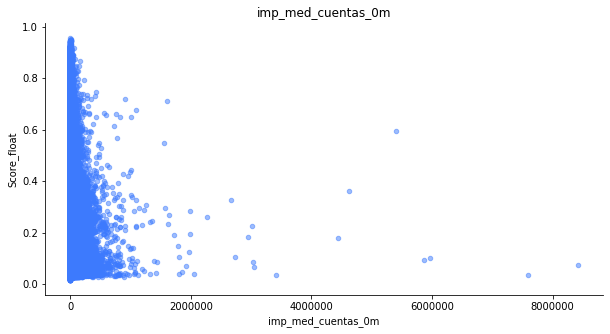

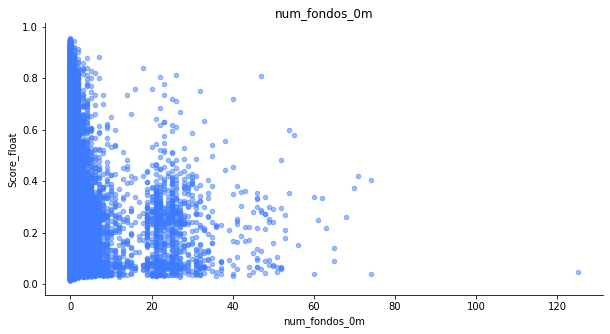

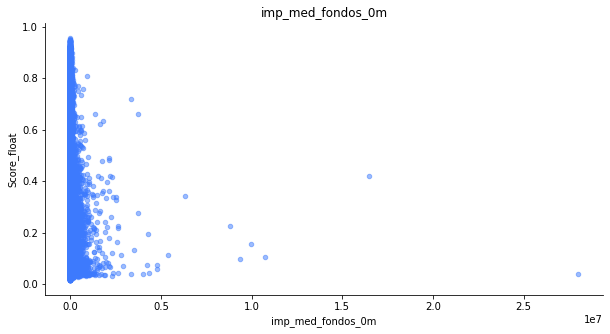

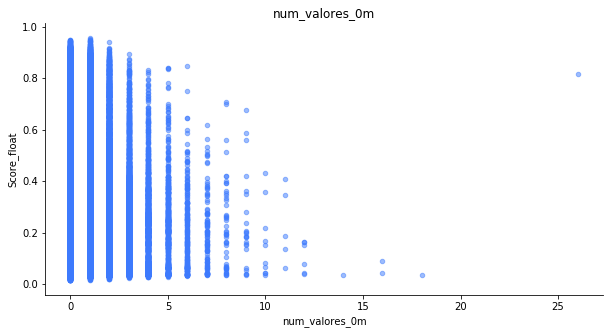

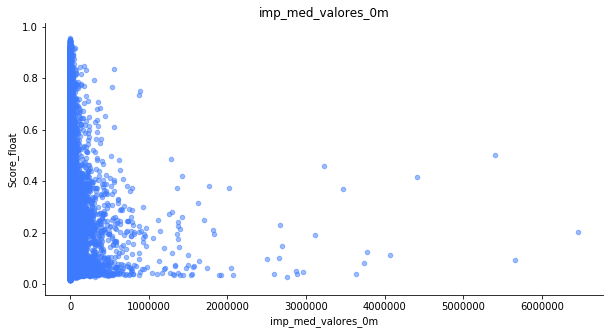

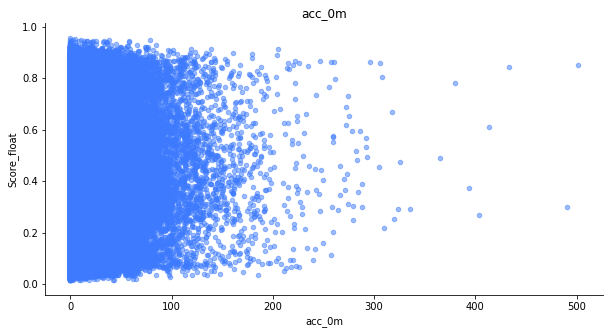

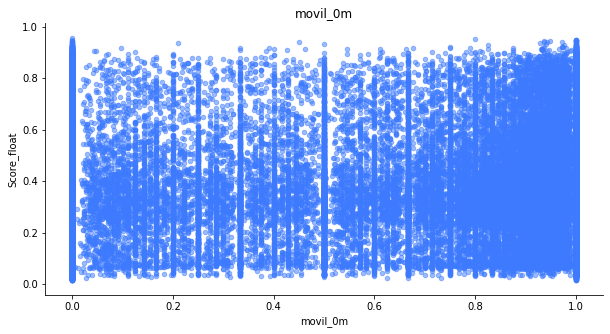

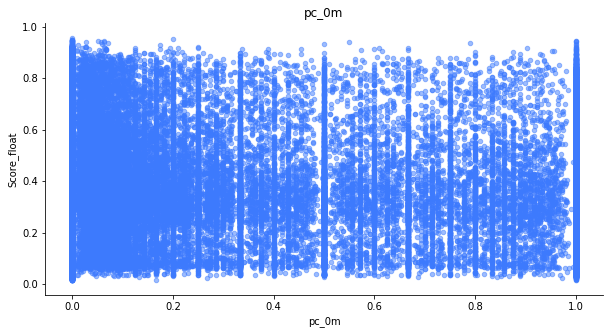

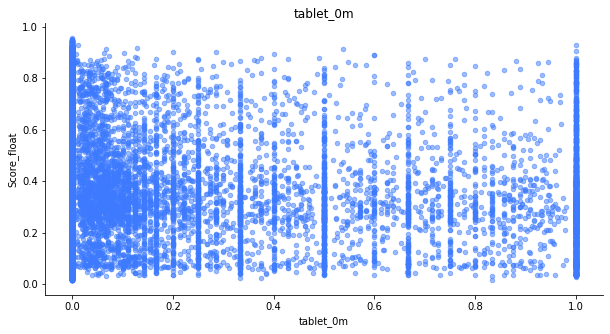

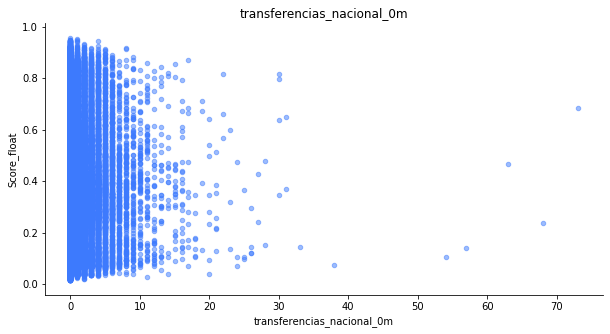

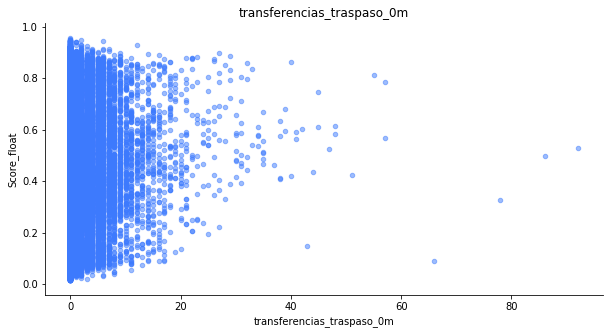

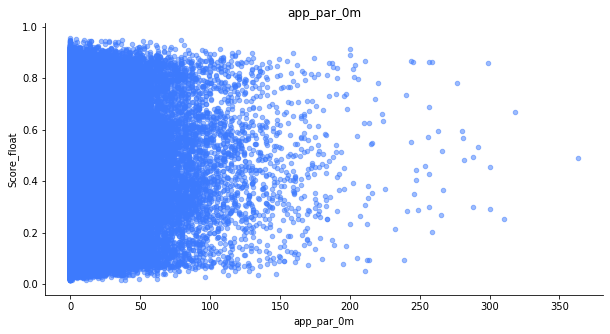

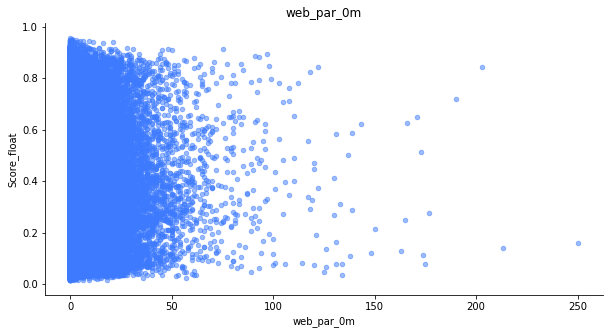

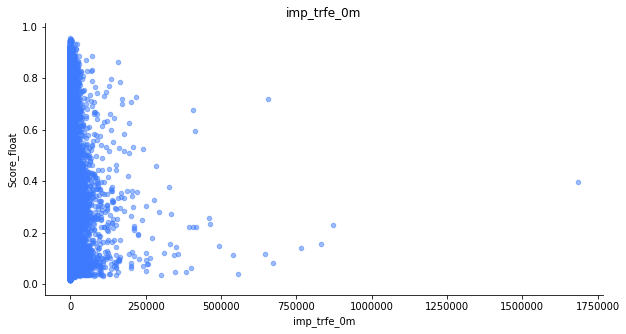

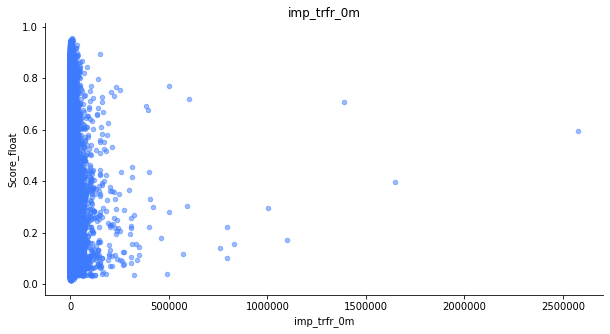

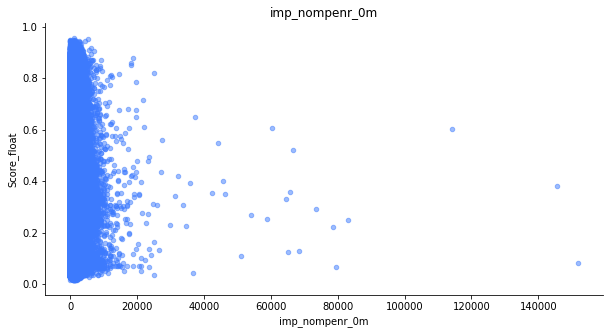

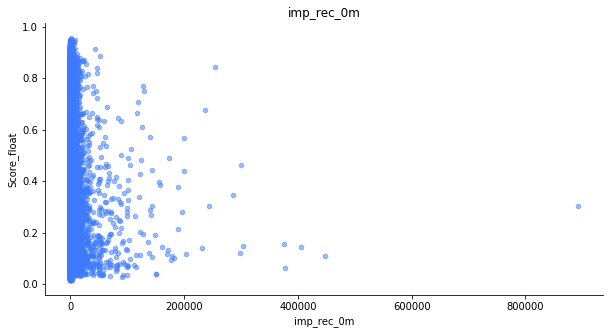

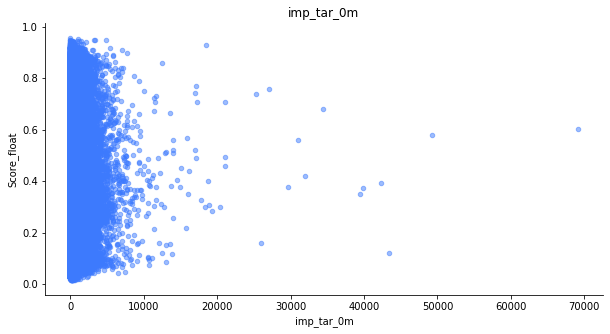

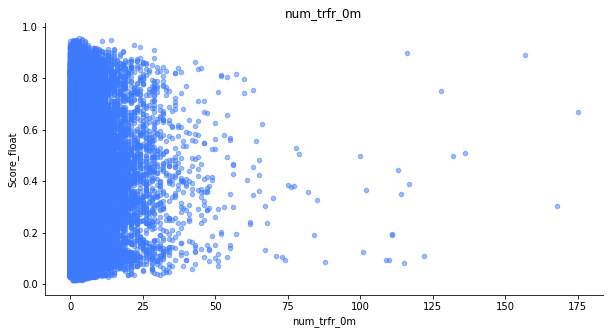

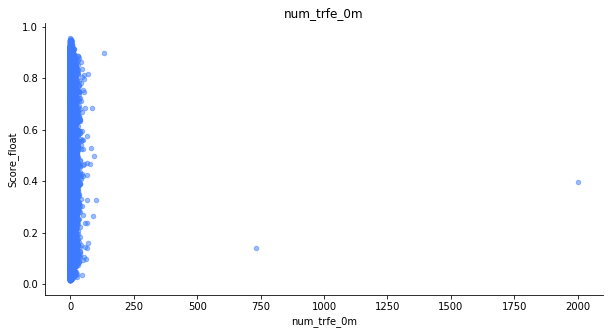

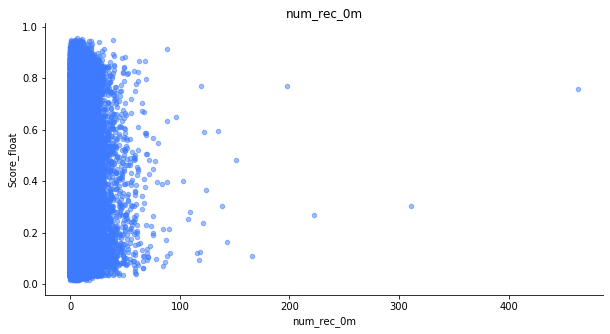

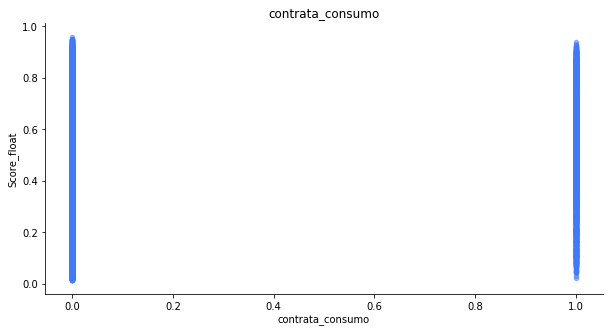

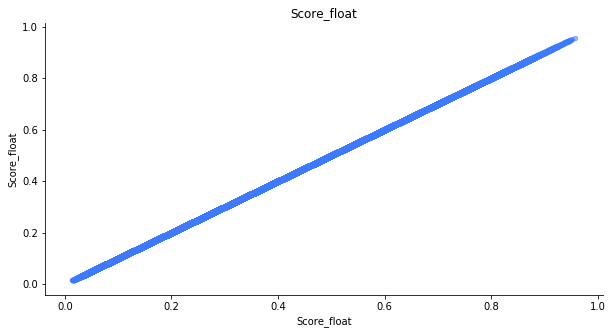

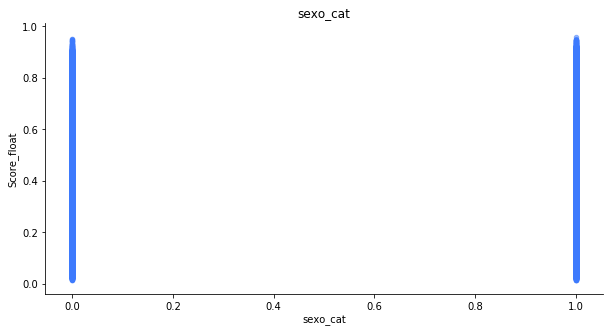

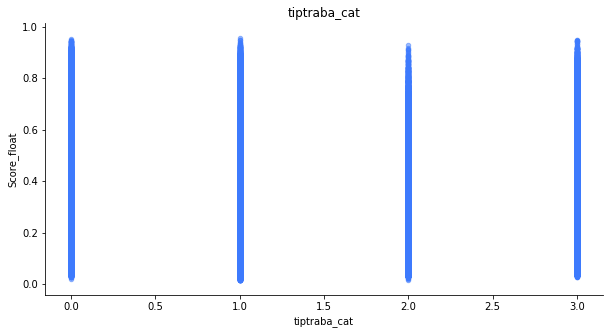

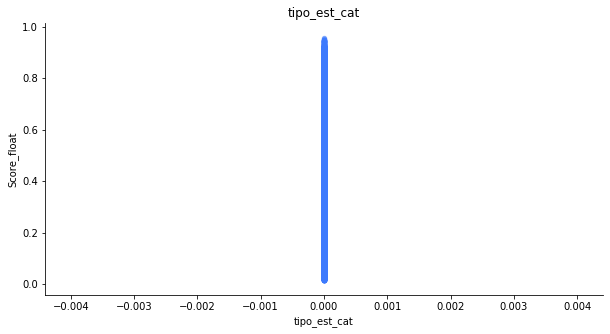

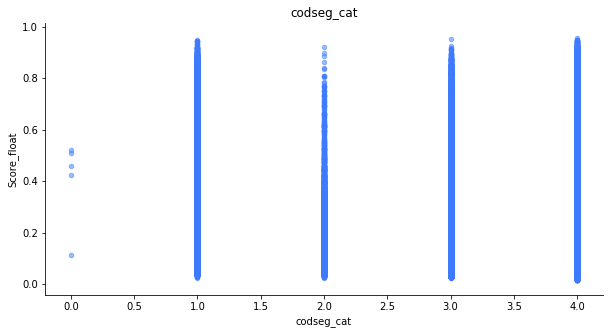

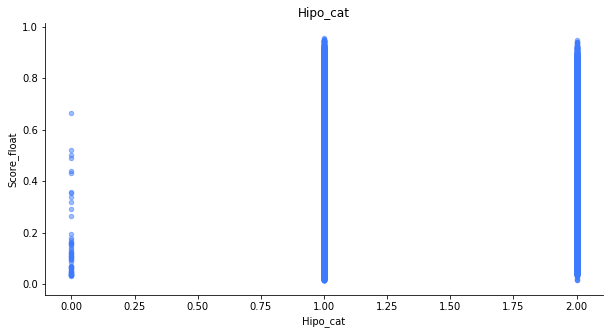

In [609]:


# numeric_columns = total_clients_file_categ.select_dtypes(include=[np.float64,np.int64])

for col in total_clients_file_categ:
    plt.rcParams["figure.figsize"] = (10,5)
    ax1 = numeric_columns.plot.scatter(x=col,
                               y='Score_float',
                               c='xkcd:lightish blue',alpha=0.5)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(col)

#     plt.ylim(0,1)
#     plt.xlim(0,200)

plt.show()

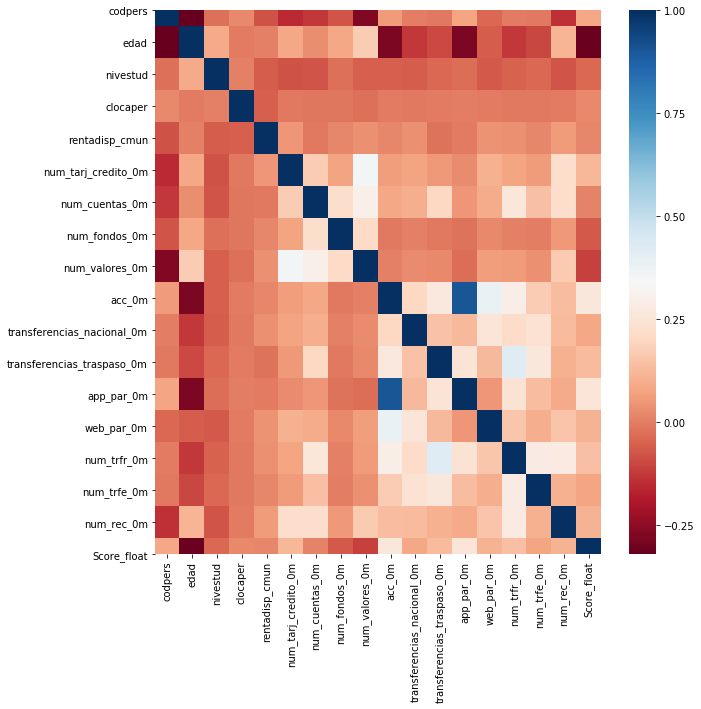

In [621]:
# I use a corr graph first between variables
plt.figure(figsize=(10,10))
sns.heatmap(total_clients_file.corr(), cmap= 'RdBu')

In [622]:
# Top varibles por correlacion 

pd.set_option('display.max_rows',60)

def get_redundant_pairs(total_clients_file_categ):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = total_clients_file_categ.columns
    for i in range(0, total_clients_file_categ.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(total_clients_file_categ, n=5):
    au_corr = total_clients_file_categ.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(total_clients_file_categ)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(total_clients_file_categ, 60))

Top Absolute Correlations
cprovper                    autonper                      0.990014
cpper                       codine                        0.989537
acc_0m                      app_par_0m                    0.906393
imp_trfe_0m                 imp_trfr_0m                   0.590917
poblac_cmun                 rentadisp_cmun                0.524590
movil_0m                    app_par_0m                    0.513934
tiptraba_cat                codseg_cat                    0.510954
imp_trfe_0m                 num_trfe_0m                   0.506870
edad                        movil_0m                      0.489644
acc_0m                      movil_0m                      0.472313
transferencias_traspaso_0m  num_trfr_0m                   0.421861
imp_rec_0m                  num_rec_0m                    0.396047
acc_0m                      web_par_0m                    0.386675
num_tarj_credito_0m         imp_med_tarj_credito_0m       0.379607
imp_trfr_0m                 num_trfe

In [624]:
total_clients_file_categ.head()

codpers  edad  nivestud  oficin  cpper  cprovper  clocaper  autonper  \
0     1957    78         3  5321.0  38006        38       419         5   
1     2807    87         5  5402.0  39527        39       888         6   
2     2917    81         3  5230.0  32910        32      2327        12   
3     3537    78         5  5021.0  33590        33     90785         3   
5     7224    70         5  1482.0  28703        28       490        13   

    codine  poblac_cmun  rentadisp_cmun  num_tarj_credito_0m  \
0  38038.0     203692.0           22339                    1   
1  39068.0          0.0               0                    0   
2  32075.0       5184.0           17802                    0   
3  33055.0       1753.0           15894                    0   
5  28134.0      86707.0           26447                    2   

   imp_med_tarj_credito_0m  num_cuentas_0m  imp_med_cuentas_0m  num_fondos_0m  \
0                   -88.21               1             1279.30              0   
1                     0.00               2            30566.78              2   
2                     0.00               2            14419.44              0   
3                     0.00               1             1111.98              0   
5                   135.05               1           113780.80              0   

   imp_med_fondos_0m  num_valores_0m  imp_med_valores_0m  acc_0m  movil_0m  \
0               0.00               0                0.00       2       0.0   
1         1830280.57               2          1893829.28       0       0.0   
2               0.00               0                0.00       0       0.0   
3               0.00               1                3.58       0       0.0   
5               0.00               1                3.58      12       1.0   

   pc_0m  tablet_0m  transferencias_nacional_0m  transferencias_traspaso_0m  \
0    1.0        0.0                           0                           0   
1    0.0        0.0                           0                           0   
2    0.0        0.0                           0                           0   
3    0.0        0.0                           0                           0   
5    0.0        0.0                           0                           0   

   app_par_0m  web_par_0m  imp_trfe_0m  imp_trfr_0m  imp_nompenr_0m  \
0           0           2       156.87      1347.56         1347.56   
1           0           0         0.00         0.00            0.00   
2           0           0         0.00       392.00          392.00   
3           0           0        10.00      3380.88         1380.88   
5          12           0         0.00      2768.65         1300.14   

   imp_rec_0m  imp_tar_0m  num_trfr_0m  num_trfe_0m  num_rec_0m  sexo_cat  \
0     1195.73      506.28            1            2          11         0   
1     1172.13        0.00            0            0           3         1   
2       56.41      150.13            1            0           2         1   
3      145.71      683.70            2            1           2         1   
5     1367.26      722.13            4            0          10         1   

   tiptraba_cat  tipo_est_cat  codseg_cat  Hipo_cat  
0             1             0           4         1  
1             2             0           2         1  
2             1             0           4         1  
3             1             0           4         1  
5             1             0           3         1

# Global Surrogate Method

In [18]:
# Train - Test

# separating the dependent and independent variables
X = total_clients_file_categ.drop('Score_float',1)
y = total_clients_file_categ['Score_float']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


In [19]:
# Training a Decision Tree Model 

dt_clients_file_categ = DecisionTreeRegressor(max_depth = 4, random_state=10)

# fitting the decision tree model on the training set
dt_clients_file_categ.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

No handles with labels found to put in legend.


|--- imp_tar_0m <= 4.44
|   |--- edad <= 74.50
|   |   |--- imp_med_tarj_credito_0m <= -0.14
|   |   |   |--- imp_med_cuentas_0m <= 52.26
|   |   |   |   |--- value: [0.40]
|   |   |   |--- imp_med_cuentas_0m >  52.26
|   |   |   |   |--- value: [0.70]
|   |   |--- imp_med_tarj_credito_0m >  -0.14
|   |   |   |--- imp_med_cuentas_0m <= 3051.93
|   |   |   |   |--- value: [0.22]
|   |   |   |--- imp_med_cuentas_0m >  3051.93
|   |   |   |   |--- value: [0.12]
|   |--- edad >  74.50
|   |   |--- imp_med_cuentas_0m <= 766.71
|   |   |   |--- edad <= 76.50
|   |   |   |   |--- value: [0.17]
|   |   |   |--- edad >  76.50
|   |   |   |   |--- value: [0.06]
|   |   |--- imp_med_cuentas_0m >  766.71
|   |   |   |--- codpers <= 48343488.00
|   |   |   |   |--- value: [0.04]
|   |   |   |--- codpers >  48343488.00
|   |   |   |   |--- value: [0.06]
|--- imp_tar_0m >  4.44
|   |--- imp_med_cuentas_0m <= 8064.91
|   |   |--- imp_med_tarj_credito_0m <= -0.03
|   |   |   |--- edad <= 76.50
|   |   

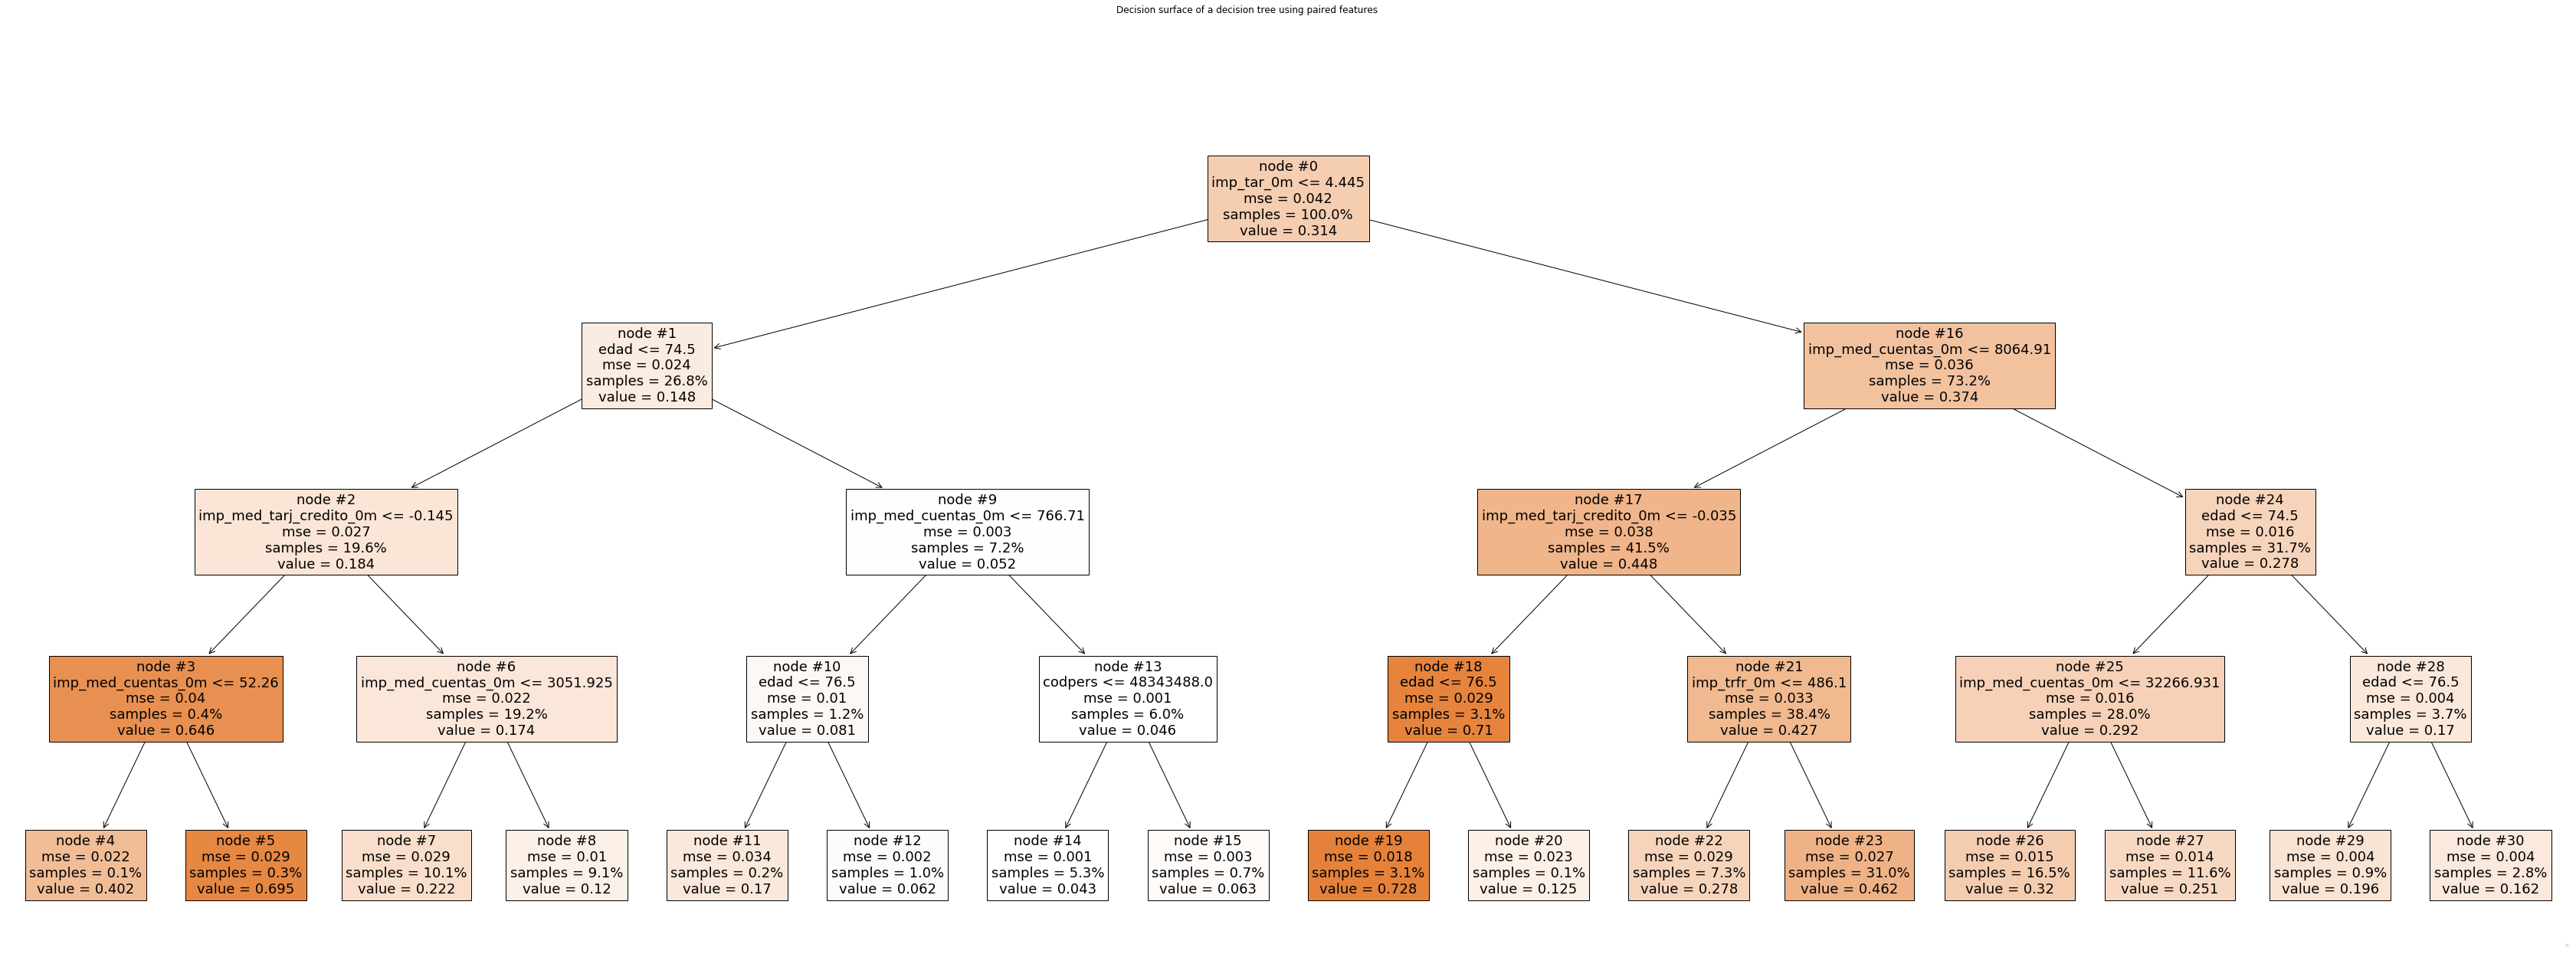

In [79]:
# plot, tree branches, weights 

plt.figure(figsize=(60,20))
dt_clients_file_categ_plot = tree.plot_tree(dt_clients_file_categ,fontsize=18,feature_names=list(X.columns),filled=True,node_ids=True,proportion=True, rotate=True,precision=3)

r = export_text(dt_clients_file_categ , feature_names=list(X.columns))
print(r)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.autoscale(enable=True, axis='X')
plt.autoscale(enable=True, axis='y')

plt.show()




# Feature Importance

In [21]:
# creating the Random Forest Regressor model

rf = RandomForestRegressor(n_estimators=200, max_depth=4, min_samples_leaf=100,n_jobs=-1)
rf.fit(X_train,y_train)

# feature importance of the random forest model
feature_importance = pd.DataFrame()
feature_importance['variable'] = X_train.columns
feature_importance['importance'] = rf.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='importance', ascending=False).head(10)

variable    importance
31                  imp_tar_0m  4.339137e-01
14          imp_med_cuentas_0m  2.666214e-01
12     imp_med_tarj_credito_0m  1.386679e-01
28                 imp_trfr_0m  8.870969e-02
1                         edad  7.203790e-02
0                      codpers  4.878585e-05
3                       oficin  7.211673e-07
24  transferencias_traspaso_0m  0.000000e+00
25                  app_par_0m  0.000000e+00
26                  web_par_0m  0.000000e+00

# Global Surrogate

surrogate decision tree model for this random forest model.


In [69]:
# saving the predictions of Random Forest as new target
new_target = rf.predict(X_train)

# defining the interpretable decision tree model
dt_new_target = DecisionTreeRegressor(max_depth=4, random_state=10)

# fitting the surrogate decision tree model using the training set and new target
dt_new_target.fit(X_train,new_target)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

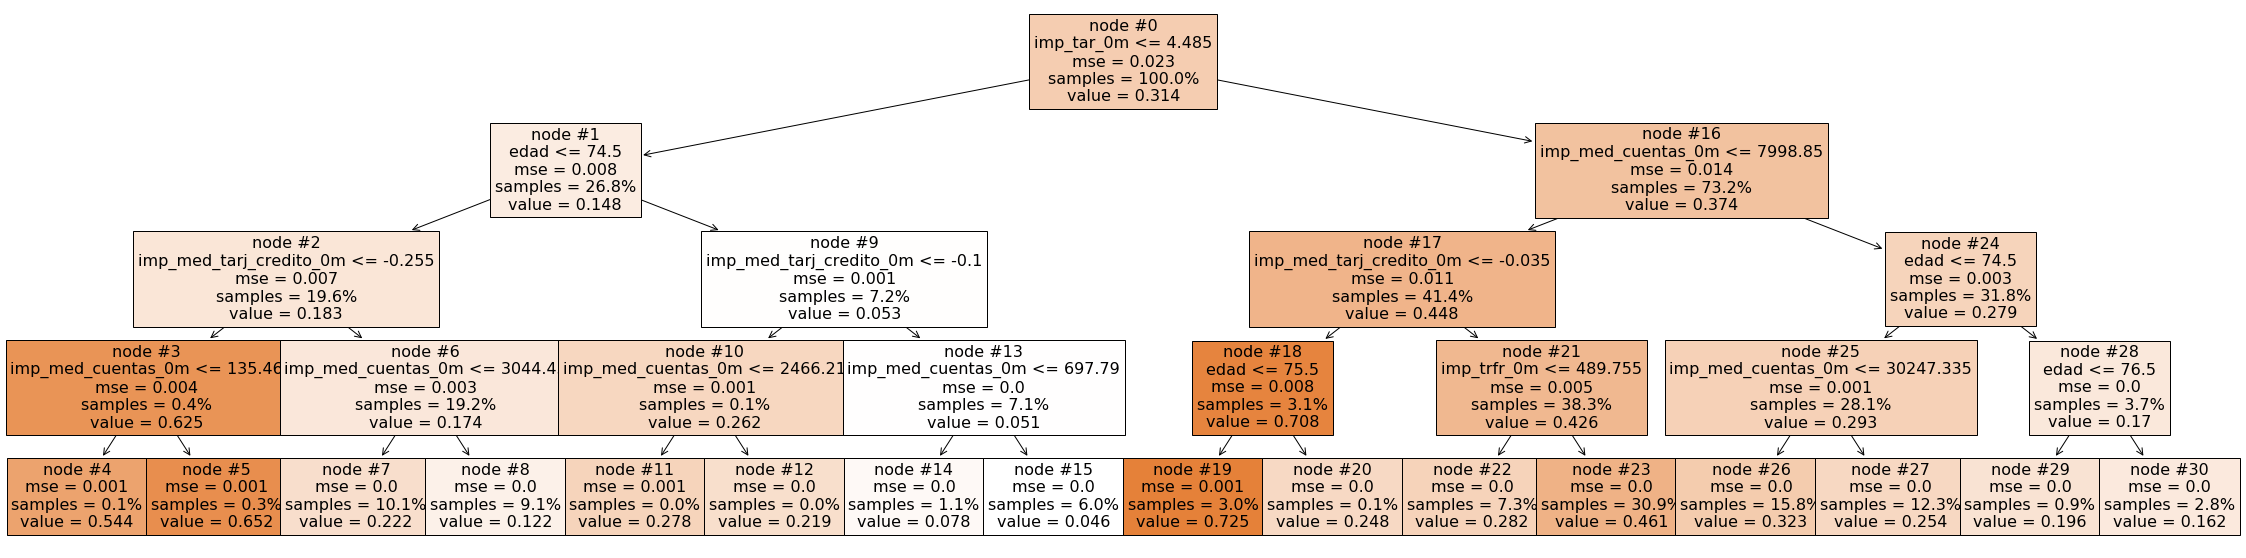

In [70]:
# plotting 
plt.figure(figsize=(40,10))
dt_new_target = tree.plot_tree(dt_new_target,fontsize=16,feature_names=list(X.columns),filled=True,node_ids=True,proportion=True, rotate=True,precision=3)



# Implementing LIME to generate local interpretations of black-box 
Locally Interpretable Model-Agnostic Explanations

In [72]:
!pip install lime

# import Explainer function from lime_tabular module of lime library
from lime.lime_tabular import LimeTabularExplainer

  Created wheel for lime: filename=lime-0.1.1.37-cp37-none-any.whl size=284281 sha256=e8c2cde5af7b8710ef354edd74215354f06f26da8c67f937977ba798c39c6066
  Stored in directory: C:\Users\N58645\AppData\Local\pip\Cache\wheels\c1\38\e7\50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12078 sha256=d9daee15c697a1461a9c5f7764ac40c7cbec7ce617f6a0df8a742378b44809e8
  Stored in directory: C:\Users\N58645\AppData\Local\pip\Cache\wheels\c0\e9\6b\ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [88]:
# installing lime library

# training the random forest model
rf_model = RandomForestRegressor(n_estimators=200,max_depth=4, min_samples_leaf=100,n_jobs=-1, random_state=10)
rf_model.fit(X_train, y_train)

# creating the explainer function
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)



In [103]:
# storing a new observation
i = 3
X_observation = X_test.iloc[[i], :]

RF_prediction: {rf_model.predict(X_observation)[0]}
# X_observation

In [95]:
# Explanations using LIME  with the random forest model

explanation = explainer.explain_instance(X_observation.values[0], rf_model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)


0.4546474658363381
